# Preparation

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split   
from sklearn.metrics import accuracy_score        
from sklearn.metrics import confusion_matrix    
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# Load Dataset

In [3]:
dataset= pd.read_csv('healthcare-dataset-stroke-data.csv')
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Insight yang ingin di dapatkan

Memprediksi kemungkinan seseorang terkena stroke yang disebabkan oleh parameter sebagai berikut:
    - Jenis kelamin
    - Usia
    - Faktor penyakit lain
    - status merokok

# Data Cleaning

- Dari dataset = 'healthcare-dataset-stroke-data.csv'
- yang di dapatkan di website kaggle =
- Terdiri dari 12 columns dan 5110 baris

# 1. Checking Outliers

In [6]:
# Menghitung IQR dan memeriksa outlier untuk semua kolom bertipe int64 dan float64

for i in (dataset.columns):                               # membuat perulangan untuk tiap kolom di dalam dataframe
    if (dataset[i].dtypes in ['int64','float64']):        # membuat kondisi untuk memilih kolom bertipe int64 dan float 64
        print(i,':',dataset[i].dtypes)                    # mencetak nama kolom dan tipe datanya
        
        Q1 = dataset[i].quantile(0.25)
        print('Q1', Q1)
        
        Q3 = dataset[i].quantile(0.75)
        print('Q3', Q3)
        
        IQR = Q3-Q1
        print('IQR', IQR)
        
        nilai_min = dataset[i].min()
        nilai_max = dataset[i].max()
        
        min_IQR = Q1 - 1.5 * IQR
        max_IQR = Q3 + 1.5 * IQR
        
        # Mencari outlier 
        if (nilai_min < min_IQR):
            print('Low outlier is found <', min_IQR)
            print('Low Outlier Index :', list(dataset[dataset[i] < min_IQR].index))
        if (nilai_max > max_IQR):
            print('High outlier is found >', max_IQR)
            print('High outlier Index : ', list(dataset[dataset[i] > max_IQR].index))

        print('\n')

id : int64
Q1 17741.25
Q3 54682.0
IQR 36940.75


age : float64
Q1 25.0
Q3 61.0
IQR 36.0


hypertension : int64
Q1 0.0
Q3 0.0
IQR 0.0
High outlier is found > 0.0
High outlier Index :  [4, 6, 10, 15, 17, 21, 30, 32, 35, 37, 44, 45, 49, 51, 53, 58, 59, 61, 62, 65, 69, 71, 72, 76, 83, 93, 98, 106, 115, 116, 121, 123, 126, 130, 131, 132, 134, 138, 142, 143, 144, 148, 159, 163, 164, 167, 168, 171, 173, 175, 177, 184, 187, 191, 193, 196, 201, 208, 217, 218, 220, 229, 233, 238, 243, 247, 250, 258, 269, 270, 281, 297, 314, 317, 326, 331, 350, 355, 360, 382, 386, 396, 399, 411, 426, 439, 444, 457, 466, 467, 468, 479, 505, 530, 565, 571, 577, 594, 599, 651, 654, 666, 668, 680, 688, 689, 700, 713, 715, 744, 751, 759, 782, 786, 788, 816, 821, 826, 829, 841, 849, 871, 882, 888, 890, 894, 897, 928, 944, 964, 970, 990, 1000, 1013, 1031, 1058, 1062, 1067, 1075, 1077, 1106, 1114, 1116, 1125, 1151, 1161, 1166, 1183, 1188, 1189, 1199, 1213, 1225, 1240, 1245, 1250, 1283, 1293, 1294, 1306, 1315, 1322, 1325,

High outlier is found > 47.5
High outlier Index :  [21, 113, 254, 258, 270, 333, 341, 358, 430, 462, 466, 493, 539, 544, 595, 622, 637, 662, 672, 715, 761, 805, 860, 928, 1003, 1061, 1077, 1239, 1257, 1267, 1304, 1322, 1501, 1532, 1559, 1564, 1575, 1584, 1595, 1641, 1660, 1782, 1898, 1988, 2016, 2067, 2071, 2081, 2128, 2136, 2232, 2277, 2284, 2290, 2309, 2330, 2411, 2441, 2545, 2555, 2567, 2585, 2723, 2764, 2815, 2840, 2883, 2896, 3024, 3060, 3218, 3238, 3243, 3305, 3333, 3439, 3508, 3541, 3588, 3606, 3688, 3702, 3825, 3867, 3909, 3931, 3959, 3980, 4071, 4126, 4154, 4188, 4209, 4223, 4225, 4351, 4405, 4407, 4456, 4475, 4650, 4704, 4779, 4838, 4847, 4858, 4906, 4952, 5009, 5057]


stroke : int64
Q1 0.0
Q3 0.0
IQR 0.0
High outlier is found > 0.0
High outlier Index :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 5

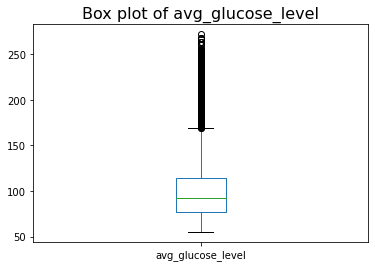

In [7]:
# Menampilkan outliers kolom avg_glucose_level sebelum dihapus

dataset['avg_glucose_level'].plot(kind='box')
plt.title('Box plot of avg_glucose_level', size=16)
plt.show()

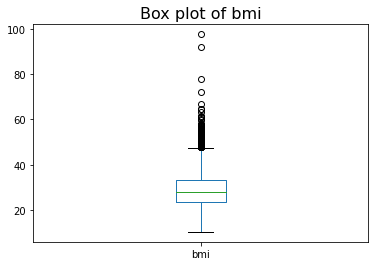

In [8]:
# menampilkan outlier kolom bmi sebelum dihapus

dataset['bmi'].plot(kind='box')
plt.title("Box plot of bmi", size=16)
plt.show()

In [9]:
agl = [0, 1, 3, 4, 5, 13, 14, 16, 17, 19, 20, 21, 22, 23, 27, 28, 29, 30, 32, 33, 36, 44, 45, 54, 55, 57, 58, 59, 60, 66, 71, 73, 76, 90, 95, 97, 101, 102, 107, 113, 115, 122, 123, 124, 128, 130, 132, 134, 135, 137, 138, 139, 144, 149, 150, 151, 155, 157, 158, 163, 175, 179, 187, 189, 190, 193, 195, 196, 201, 212, 215, 217, 218, 219, 220, 222, 225, 226, 233, 234, 235, 241, 242, 243, 254, 256, 258, 272, 277, 278, 293, 298, 303, 307, 314, 318, 325, 326, 330, 331, 332, 337, 343, 350, 355, 360, 365, 386, 396, 399, 411, 417, 426, 429, 433, 436, 444, 456, 466, 467, 468, 477, 479, 492, 515, 544, 549, 551, 552, 559, 563, 570, 576, 581, 583, 585, 595, 598, 599, 610, 616, 620, 642, 706, 708, 719, 744, 746, 755, 762, 770, 785, 816, 846, 848, 851, 865, 867, 880, 887, 894, 923, 929, 930, 946, 948, 970, 971, 1011, 1059, 1061, 1067, 1070, 1071, 1092, 1097, 1102, 1104, 1113, 1118, 1131, 1158, 1166, 1173, 1178, 1187, 1189, 1200, 1202, 1207, 1214, 1225, 1228, 1233, 1245, 1250, 1257, 1277, 1282, 1300, 1309, 1319, 1322, 1339, 1343, 1346, 1379, 1382, 1384, 1398, 1411, 1412, 1414, 1428, 1436, 1453, 1457, 1468, 1472, 1474, 1485, 1487, 1497, 1503, 1512, 1526, 1529, 1531, 1533, 1534, 1535, 1540, 1547, 1553, 1588, 1596, 1598, 1607, 1626, 1627, 1628, 1650, 1654, 1655, 1659, 1667, 1675, 1681, 1698, 1704, 1711, 1718, 1723, 1732, 1737, 1756, 1759, 1769, 1778, 1780, 1782, 1795, 1798, 1816, 1820, 1827, 1837, 1840, 1841, 1843, 1853, 1862, 1873, 1880, 1888, 1889, 1892, 1893, 1898, 1905, 1952, 1971, 1981, 1995, 2004, 2018, 2044, 2059, 2067, 2069, 2079, 2081, 2089, 2096, 2102, 2107, 2124, 2126, 2129, 2132, 2135, 2149, 2158, 2161, 2166, 2168, 2169, 2180, 2182, 2185, 2200, 2201, 2203, 2223, 2228, 2240, 2255, 2257, 2273, 2282, 2284, 2290, 2291, 2292, 2293, 2294, 2303, 2307, 2318, 2332, 2336, 2338, 2365, 2374, 2383, 2395, 2418, 2429, 2439, 2453, 2455, 2459, 2462, 2469, 2486, 2493, 2494, 2515, 2520, 2523, 2532, 2540, 2544, 2548, 2553, 2565, 2569, 2578, 2583, 2599, 2600, 2609, 2612, 2624, 2629, 2633, 2637, 2641, 2661, 2675, 2676, 2679, 2682, 2685, 2686, 2690, 2693, 2697, 2699, 2707, 2710, 2734, 2751, 2752, 2757, 2768, 2846, 2848, 2849, 2855, 2866, 2867, 2880, 2890, 2893, 2918, 2928, 2934, 2947, 2957, 2960, 2966, 2981, 2992, 2997, 3005, 3008, 3014, 3017, 3054, 3060, 3069, 3074, 3088, 3130, 3146, 3148, 3150, 3152, 3157, 3161, 3186, 3197, 3198, 3215, 3221, 3224, 3234, 3238, 3243, 3252, 3306, 3318, 3327, 3342, 3350, 3360, 3375, 3376, 3378, 3381, 3387, 3391, 3393, 3406, 3425, 3427, 3439, 3455, 3461, 3462, 3478, 3480, 3489, 3500, 3507, 3510, 3517, 3522, 3536, 3537, 3548, 3564, 3578, 3587, 3594, 3599, 3600, 3606, 3625, 3627, 3630, 3637, 3643, 3658, 3674, 3686, 3688, 3699, 3700, 3718, 3734, 3753, 3756, 3771, 3772, 3779, 3780, 3781, 3788, 3802, 3833, 3882, 3889, 3892, 3905, 3909, 3913, 3925, 3931, 3943, 3956, 3959, 3962, 3964, 3965, 3980, 3982, 3994, 4008, 4022, 4028, 4037, 4046, 4048, 4051, 4054, 4096, 4104, 4123, 4129, 4132, 4164, 4176, 4201, 4207, 4240, 4249, 4261, 4274, 4283, 4286, 4290, 4291, 4304, 4311, 4321, 4324, 4325, 4327, 4329, 4335, 4339, 4344, 4356, 4360, 4366, 4376, 4377, 4390, 4434, 4437, 4446, 4447, 4453, 4457, 4470, 4475, 4497, 4500, 4504, 4505, 4507, 4514, 4515, 4530, 4539, 4560, 4577, 4578, 4582, 4588, 4589, 4598, 4616, 4625, 4627, 4628, 4636, 4654, 4665, 4684, 4696, 4702, 4708, 4711, 4724, 4737, 4738, 4739, 4740, 4750, 4763, 4809, 4816, 4823, 4836, 4855, 4861, 4869, 4883, 4895, 4899, 4909, 4921, 4925, 4941, 4952, 4955, 4983, 4984, 4986, 4987, 4995, 5001, 5006, 5019, 5029, 5034, 5035, 5041, 5048, 5061, 5062, 5063, 5064, 5076]

In [10]:
# menghapus outliers dan mereset indeksnya
df_without_outlier = dataset.drop(sorted(agl), axis=0)

# mereset indeks dataframe setelah menghapus outliers
df_without_outlier.reset_index(drop=True, inplace=True)
df_without_outlier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4483 entries, 0 to 4482
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4483 non-null   int64  
 1   gender             4483 non-null   object 
 2   age                4483 non-null   float64
 3   hypertension       4483 non-null   int64  
 4   heart_disease      4483 non-null   int64  
 5   ever_married       4483 non-null   object 
 6   work_type          4483 non-null   object 
 7   Residence_type     4483 non-null   object 
 8   avg_glucose_level  4483 non-null   float64
 9   bmi                4343 non-null   float64
 10  smoking_status     4483 non-null   object 
 11  stroke             4483 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 420.4+ KB


In [11]:
# Menghitung IQR dan memeriksa outlier untuk semua kolom bertipe int64 dan float64

for i in (df_without_outlier.columns):                               # membuat perulangan untuk tiap kolom di dalam dataframe
    if (df_without_outlier[i].dtypes in ['int64','float64']):        # membuat kondisi untuk memilih kolom bertipe int64 dan float 64
        print(i,':',dataset[i].dtypes)                    # mencetak nama kolom dan tipe datanya
        
        Q1 = df_without_outlier[i].quantile(0.25)
        print('Q1', Q1)
        
        Q3 = df_without_outlier[i].quantile(0.75)
        print('Q3', Q3)
        
        IQR = Q3-Q1
        print('IQR', IQR)
        
        nilai_min = df_without_outlier[i].min()
        nilai_max = df_without_outlier[i].max()
        
        min_IQR = Q1 - 1.5 * IQR
        max_IQR = Q3 + 1.5 * IQR
        
        # Mencari outlier 
        if (nilai_min < min_IQR):
            print('Low outlier is found <', min_IQR)
            print('Low Outlier Index :', list(df_without_outliert[df_without_outlier[i] < min_IQR].index))
        if (nilai_max > max_IQR):
            print('High outlier is found >', max_IQR)
            print('High outlier Index : ', list(df_without_outlier[df_without_outlier[i] > max_IQR].index))

        print('\n')

id : int64
Q1 17877.0
Q3 54815.5
IQR 36938.5


age : float64
Q1 23.0
Q3 58.0
IQR 35.0


hypertension : int64
Q1 0.0
Q3 0.0
IQR 0.0
High outlier is found > 0.0
High outlier Index :  [1, 5, 8, 15, 16, 26, 28, 30, 32, 33, 36, 39, 41, 50, 59, 62, 68, 75, 80, 82, 85, 90, 91, 95, 100, 104, 107, 108, 111, 113, 116, 122, 126, 139, 151, 157, 163, 166, 182, 183, 191, 206, 222, 275, 323, 339, 381, 405, 434, 439, 444, 458, 508, 511, 523, 525, 537, 545, 546, 557, 568, 570, 603, 610, 631, 634, 636, 668, 673, 676, 688, 694, 713, 723, 728, 730, 736, 766, 780, 798, 822, 832, 844, 862, 889, 891, 901, 903, 928, 935, 937, 945, 970, 979, 998, 1002, 1012, 1023, 1046, 1084, 1094, 1095, 1106, 1114, 1122, 1144, 1199, 1210, 1241, 1249, 1254, 1268, 1269, 1291, 1311, 1314, 1320, 1327, 1328, 1343, 1379, 1414, 1432, 1477, 1485, 1491, 1493, 1497, 1517, 1518, 1529, 1541, 1550, 1554, 1562, 1572, 1573, 1599, 1602, 1606, 1625, 1636, 1674, 1692, 1710, 1731, 1771, 1781, 1791, 1794, 1796, 1809, 1810, 1815, 1822, 1830, 1866

In [12]:
bmi = [183, 232, 239, 253, 261, 304, 316, 344, 369, 414, 480, 495, 519, 529, 570, 612, 653, 704, 766, 835, 903, 1045, 1070, 1104, 1278, 1304, 1325, 1330, 1341, 1350, 1360, 1400, 1415, 1705, 1731, 1781, 1830, 1835, 1917, 1958, 1981, 2001, 2058, 2075, 2102, 2192, 2200, 2211, 2226, 2342, 2379, 2429, 2454, 2490, 2501, 2615, 2793, 2874, 2899, 3052, 3080, 3123, 3222, 3334, 3375, 3422, 3554, 3606, 3632, 3664, 3683, 3697, 3699, 3807, 3855, 3857, 3901, 3967, 4003, 4071, 4109, 4120, 4186, 4241, 4250, 4260, 4303, 4393, 4435, 4476]

In [13]:
# menghapus outliers dan mereset indeksnya
df = df_without_outlier.drop(sorted(bmi), axis=0)

# mereset indeks dataframe setelah menghapus outliers
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4393 entries, 0 to 4392
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4393 non-null   int64  
 1   gender             4393 non-null   object 
 2   age                4393 non-null   float64
 3   hypertension       4393 non-null   int64  
 4   heart_disease      4393 non-null   int64  
 5   ever_married       4393 non-null   object 
 6   work_type          4393 non-null   object 
 7   Residence_type     4393 non-null   object 
 8   avg_glucose_level  4393 non-null   float64
 9   bmi                4253 non-null   float64
 10  smoking_status     4393 non-null   object 
 11  stroke             4393 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 412.0+ KB


- kolom "avg_glucose_level"

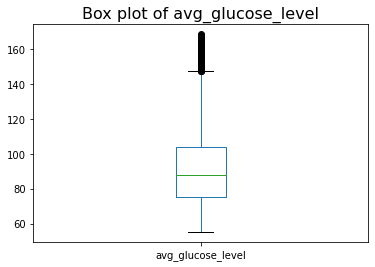

In [14]:
# Box plot setelah Outliers dihapus
df['avg_glucose_level'].plot(kind='box')
plt.title('Box plot of avg_glucose_level', size=16)
plt.show()

- kolom "bmi"

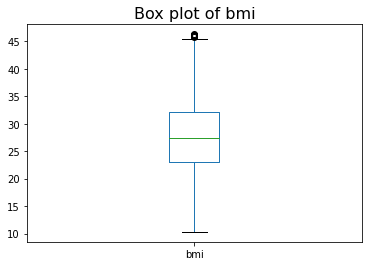

In [15]:
# Box plot setelah Outliers dihapus
df['bmi'].plot(kind='box')
plt.title("Box plot of bmi", size=16)
plt.show()

- __Inisght:__ 
    - Terdapat dua kolom fiture yang menganding Outliers yaitu kolom <code>age</code> dengan kolom <code>bmi</code>
    - Dilakukan penghapusan outliers, agar tidak mengganggu pemodelan Machine Learning kedepannya

# 2. Duplicated values

In [16]:
df.duplicated().values.any()

False

In [17]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4388    False
4389    False
4390    False
4391    False
4392    False
Length: 4393, dtype: bool

In [18]:
df[df.duplicated(keep=False)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


- Kesimpulan:
    - Setelah dilakukan pengecheckan tiga kali TIDAK ditemukan data ganda atau duplicated values

# 3. Missing Values

In [19]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [20]:
df.isnull().values.any()

True

In [21]:
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [22]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  140
smoking_status         0
stroke                 0
dtype: int64

In [23]:
df['bmi'].value_counts().head()

28.7    37
27.6    36
23.4    35
28.4    35
25.1    34
Name: bmi, dtype: int64

In [24]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4393.000000,4393.000000,4393.000000,4393.000000,4393.000000,4253.000000,4393.000000
mean,36621.726611,40.885809,0.074209,0.039153,91.481320,27.776017,0.037560
std,21161.190291,22.547395,0.262140,0.193981,22.662683,6.676331,0.190151
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17885.000000,23.000000,0.000000,0.000000,75.080000,23.000000,0.000000
50%,37011.000000,42.000000,0.000000,0.000000,88.040000,27.400000,0.000000
75%,54871.000000,58.000000,0.000000,0.000000,104.020000,32.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,168.680000,46.300000,1.000000


In [25]:
df['bmi'].fillna(27.4, inplace=True)

In [26]:
df.isnull().values.any()

False

In [27]:
df.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [28]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [29]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4393.000000,4393.000000,4393.000000,4393.000000,4393.000000,4393.000000,4393.000000
mean,36621.726611,40.885809,0.074209,0.039153,91.481320,27.764034,0.037560
std,21161.190291,22.547395,0.262140,0.193981,22.662683,6.569393,0.190151
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17885.000000,23.000000,0.000000,0.000000,75.080000,23.200000,0.000000
50%,37011.000000,42.000000,0.000000,0.000000,88.040000,27.400000,0.000000
75%,54871.000000,58.000000,0.000000,0.000000,104.020000,31.900000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,168.680000,46.300000,1.000000


- Kesimpulan:
    - Treatment dataset untuk khasus missing values telah selesai dengan mengganti missing values dengan median pada kolom bmi

# 3. Data Formating

In [30]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


- <code>Ubah tipe data

In [31]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [32]:
df['age'] = df['age'].astype('int64')

In [33]:
df.dtypes

id                     int64
gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

- Kesimpulan:
    - Data formating dari dataset yaitu mengganti tipe data. Dimana dataset sebelumnya pada kolom <code>age</code> bertipe data float64 diubah menjadi int64

# Tahap Preprocessing

<code> Data Binning

__Data Binning__ adalah sebuah proses untuk mengelompokkan data ke dalam bagian-bagian yang lebih kecil yang disebut bin berdasarkan kriteria tertentu. Binning data merupakan salah satu teknik praproses data yang digunakan untuk meminimalisasi kesalahan dalam pengamatan serta terkadang dapat meningkatkan akurasi dari model prediktif.

__Kolom avg_glucose_level__

In [34]:
# Menentukan batas bin dengan linspace

binS = np.linspace(min(df['avg_glucose_level']), max(df['avg_glucose_level']), 4)
binS

array([ 55.12      ,  92.97333333, 130.82666667, 168.68      ])

In [35]:
# Membuat nama kategori

kategori = ['Low', 'Medium', 'High']

In [36]:
# Menerapkan fungsi cut untuk binning data

df['avg_glucose_level_Bins'] = pd.cut(df['avg_glucose_level'], binS, labels=kategori, include_lowest=True)
df[['id','avg_glucose_level', 'avg_glucose_level_Bins']].head(10)

,id,avg_glucose_level,avg_glucose_level_Bins
0,31112,105.92,Medium
1,53882,70.09,Low
2,10434,94.39,Medium
3,27419,76.15,Low
4,60491,58.57,Low
5,12109,80.43,Low
6,12095,120.46,Medium
7,12175,104.51,Medium
8,58202,167.41,High
9,27458,89.22,Low


In [37]:
df['avg_glucose_level_Bins'].value_counts().head()

Low       2587
Medium    1524
High       282
Name: avg_glucose_level_Bins, dtype: int64

__Kolom bmi__

In [38]:
# Menentukan batas bins dengan cut()
batas_bin = [17, 18.5, 27.0, 40]

# Menentukan kategori
kategori = ['Kurus', 'Normal', 'Gemuk']

# Binning data dengan cut()
df['bmi_Bins'] = pd.cut(df['bmi'], bins=batas_bin, labels=kategori)
df[['id','bmi', 'bmi_Bins']].head()

,id,bmi,bmi_Bins
0,31112,32.5,Gemuk
1,53882,27.4,Gemuk
2,10434,22.8,Normal
3,27419,27.4,Gemuk
4,60491,24.2,Normal


In [39]:
# Melihat modus pada kolom bmi_Bins
df['bmi_Bins'].value_counts().head()

Gemuk     2141
Normal    1695
Kurus      171
Name: bmi_Bins, dtype: int64

In [40]:
df.isnull().sum()

id                          0
gender                      0
age                         0
hypertension                0
heart_disease               0
ever_married                0
work_type                   0
Residence_type              0
avg_glucose_level           0
bmi                         0
smoking_status              0
stroke                      0
avg_glucose_level_Bins      0
bmi_Bins                  386
dtype: int64

In [41]:
df['bmi_Bins'].fillna('Gemuk', inplace=True)

In [42]:
df.isnull().values.any()

False

__Kolom Age__

In [43]:
# Mengkategorikan kolom age arar mudah dipahami
# membuat batas bins dengan cut()
batas_bins2 = [5, 17, 45, 59, 75, 90]

# Menentukan kategori
kategori2 = ['Anak-Anak', 'Remaja', 'Dewasa','Pertengahan','Lanjut Usia']

# Binning data dengan cut()
df['age_Bins'] = pd.cut(df['age'], bins=batas_bins2, labels=kategori2)
df[['id','age','age_Bins']].head()

,id,age,age_Bins
0,31112,80,Lanjut Usia
1,53882,74,Pertengahan
2,10434,69,Pertengahan
3,27419,59,Dewasa
4,60491,78,Lanjut Usia


In [44]:
df.isnull().sum()

id                          0
gender                      0
age                         0
hypertension                0
heart_disease               0
ever_married                0
work_type                   0
Residence_type              0
avg_glucose_level           0
bmi                         0
smoking_status              0
stroke                      0
avg_glucose_level_Bins      0
bmi_Bins                    0
age_Bins                  316
dtype: int64

In [45]:
df['age_Bins'].value_counts().head()

Remaja         1625
Dewasa          911
Pertengahan     675
Anak-Anak       520
Lanjut Usia     346
Name: age_Bins, dtype: int64

In [46]:
df['age_Bins'].fillna('Remaja', inplace=True)

In [47]:
df.isnull().values.any()

False

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4393 entries, 0 to 4392
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      4393 non-null   int64   
 1   gender                  4393 non-null   object  
 2   age                     4393 non-null   int64   
 3   hypertension            4393 non-null   int64   
 4   heart_disease           4393 non-null   int64   
 5   ever_married            4393 non-null   object  
 6   work_type               4393 non-null   object  
 7   Residence_type          4393 non-null   object  
 8   avg_glucose_level       4393 non-null   float64 
 9   bmi                     4393 non-null   float64 
 10  smoking_status          4393 non-null   object  
 11  stroke                  4393 non-null   int64   
 12  avg_glucose_level_Bins  4393 non-null   category
 13  bmi_Bins                4393 non-null   category
 14  age_Bins                

- __Insight:__
- Dilakukan Feature Engineering dengan menambah tiga kolom baru yaitu, <code>avg_glucose_level_Bins, bmi_Bins, age_Bins</code>

# Exploratory Data Analysist

Memprediksi kemungkinan seseorang terkena stroke yang disebabkan oleh parameter sebagai berikut:
    - Jenis kelamin
    - Usia
    - Faktor penyakit lain
    - status merokok

# Analysist of Dataset

In [49]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_Bins,bmi_Bins,age_Bins
0,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Medium,Gemuk,Lanjut Usia
1,53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,Low,Gemuk,Pertengahan
2,10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1,Medium,Normal,Pertengahan
3,27419,Female,59,0,0,Yes,Private,Rural,76.15,27.4,Unknown,1,Low,Gemuk,Dewasa
4,60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,Low,Normal,Lanjut Usia


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4393 entries, 0 to 4392
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      4393 non-null   int64   
 1   gender                  4393 non-null   object  
 2   age                     4393 non-null   int64   
 3   hypertension            4393 non-null   int64   
 4   heart_disease           4393 non-null   int64   
 5   ever_married            4393 non-null   object  
 6   work_type               4393 non-null   object  
 7   Residence_type          4393 non-null   object  
 8   avg_glucose_level       4393 non-null   float64 
 9   bmi                     4393 non-null   float64 
 10  smoking_status          4393 non-null   object  
 11  stroke                  4393 non-null   int64   
 12  avg_glucose_level_Bins  4393 non-null   category
 13  bmi_Bins                4393 non-null   category
 14  age_Bins                

In [51]:
Df = df[['age','hypertension','heart_disease','bmi','avg_glucose_level','stroke']]
Df

,age,hypertension,heart_disease,bmi,avg_glucose_level,stroke
0,80,0,1,32.5,105.92,1
1,74,1,1,27.4,70.09,1
2,69,0,0,22.8,94.39,1
3,59,0,0,27.4,76.15,1
4,78,0,0,24.2,58.57,1
...,...,...,...,...,...,...
4388,80,1,0,27.4,83.75,0
4389,81,0,0,40.0,125.20,0
4390,35,0,0,30.6,82.99,0
4391,51,0,0,25.6,166.29,0


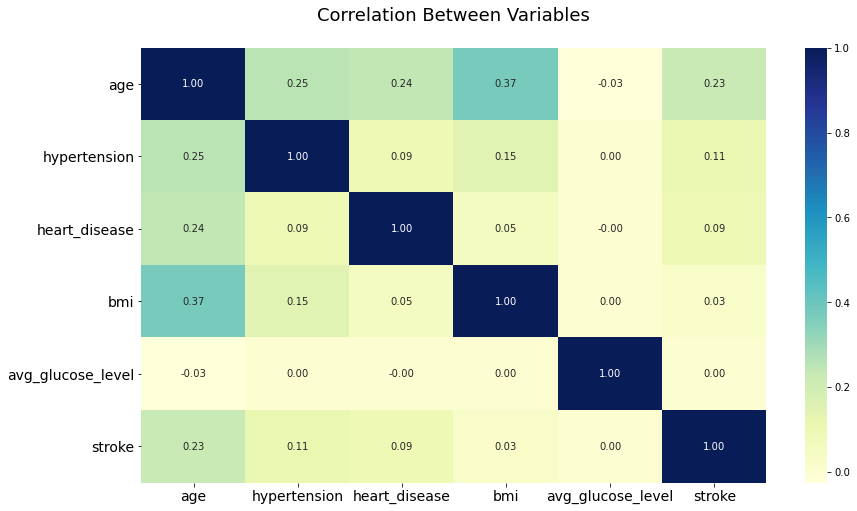

In [52]:
# Heatmap
# Melihat korelasi antarkolom dengan heatmap

plt.figure(figsize=(14,8))    # Mengatur ukuran figure

# Membuat heatmap untuk melihat korelasi kolom numerik
sns.heatmap(Df.corr(), annot=True, fmt='.2f', cmap="YlGnBu")

plt.title('Correlation Between Variables\n', size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.savefig('Correlation Between Variables.jpg', format='jpg', bbox_inches='tight')
plt.show()

- __Insight:__
- Fitur <code>age</code> memiliki korelasi tertinggi dengan kolom target <code>stroke</code>

# Analysist Stroke by Other Diseases

In [53]:
dg_penyakit_lain = df.groupby('stroke')['hypertension','heart_disease'].agg('sum')
dg_penyakit_lain

<ipython-input-53-c0bc7c3e7796>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dg_penyakit_lain = df.groupby('stroke')['hypertension','heart_disease'].agg('sum')


,hypertension,heart_disease
stroke,,
0,289,151
1,37,21


In [54]:
dg_penyakit_lain.T

stroke,0,1
hypertension,289,37
heart_disease,151,21


In [55]:
# jumlah seseorang yang tidak mengidap stroke
tS= dg_penyakit_lain.iloc[:1]
dtS= tS.T
dtS = dtS.rename(columns={0:'total'})
dtS

stroke,total
hypertension,289
heart_disease,151


In [56]:
# jumlah seseorang yang terkena stroke
St= dg_penyakit_lain.iloc[1:]
ds= St.T
ds= ds.rename(columns={ 1:'total'})
ds= ds.reset_index()
ds

stroke,index,total
0,hypertension,37
1,heart_disease,21


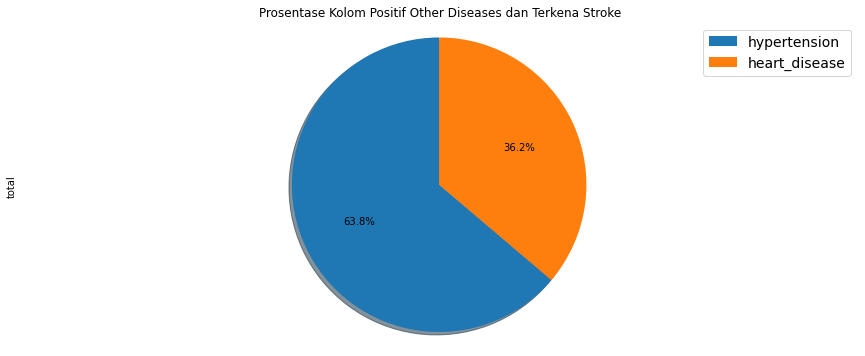

<Figure size 432x288 with 0 Axes>

In [57]:
# Membuat pie chart Kategori Umur
ds['total'].plot(kind='pie',
                   figsize=(15, 6),
                   autopct='%1.1f%%', # menambahkan persentase
                   startangle=90,     # start angle 90° 
                   shadow=True,        # menambahkan shadow
                   labels=None
                  )

plt.title('Prosentase Kolom Positif Other Diseases dan Terkena Stroke')
plt.axis('equal')     # mengatur rasio axis agar sama antara axis x dan y

# add legend
plt.legend(labels=ds['index'], loc='upper right', fontsize=14)
plt.show()
plt.savefig('Positif Stroke Other Diseases.jpg', format='jpg', bbox_inches='tight')

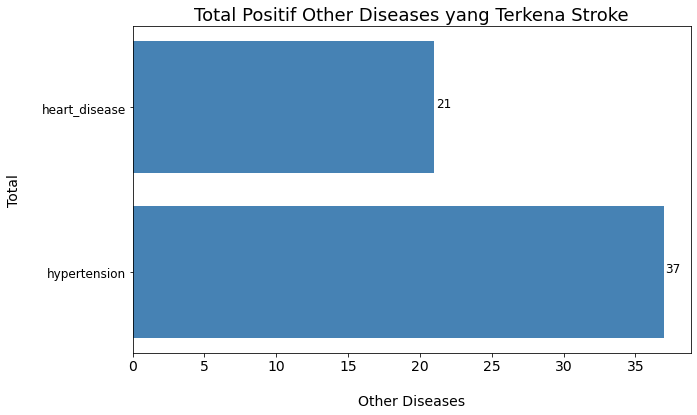

<Figure size 432x288 with 0 Axes>

In [58]:
# Membuat horizontal bar chart dengan label

plt.figure(figsize=(10,6))
plot_data = plt.barh(ds['index'], ds['total'], color='steelblue')

for index, value in enumerate(ds['total']): 
    plt.annotate(value, xy=(value+0.1, index), fontsize=12)

plt.title('Total Positif Other Diseases yang Terkena Stroke', size=18)
plt.xlabel('\nOther Diseases', size=14)
plt.ylabel('Total\n', size=14)
plt.xticks(size=14)
plt.yticks(size=12)
plt.show()
plt.savefig('Total Positif Other Diseases yang Terkena Stroke.jpg', format='jpg')

- __Insight:__ 
- Penyakit lain yang diderita oleh penderita stroke mayoritas adalah <code>hypertension</code>

# Analysist age dengan Stroke

In [59]:
# checking kolom age
d = df['age']
d.head()

0    80
1    74
2    69
3    59
4    78
Name: age, dtype: int64

In [60]:
df.dtypes

id                           int64
gender                      object
age                          int64
hypertension                 int64
heart_disease                int64
ever_married                object
work_type                   object
Residence_type              object
avg_glucose_level          float64
bmi                        float64
smoking_status              object
stroke                       int64
avg_glucose_level_Bins    category
bmi_Bins                  category
age_Bins                  category
dtype: object

In [61]:
# checking data types age
df['age']=df['age'].astype('int64')

In [62]:
# Menghitung penderta stroke berdasarkan kolom age_Bins
age_stroke = df.groupby('age_Bins')['stroke'].agg('sum')
dfa= pd.DataFrame(age_stroke).reset_index()
dfa

,age_Bins,stroke
0,Anak-Anak,1
1,Remaja,11
2,Dewasa,39
3,Pertengahan,48
4,Lanjut Usia,66


In [63]:
# Jumlah data per-kategori yang telah dibuat
age = df.groupby('age_Bins').size()
dfa1= pd.DataFrame(age).reset_index()
dfa1=dfa1.rename(columns={0: 'total'})
dfa1.set_index('age_Bins', inplace=True)
dfa1

,total
age_Bins,
Anak-Anak,520
Remaja,1941
Dewasa,911
Pertengahan,675
Lanjut Usia,346


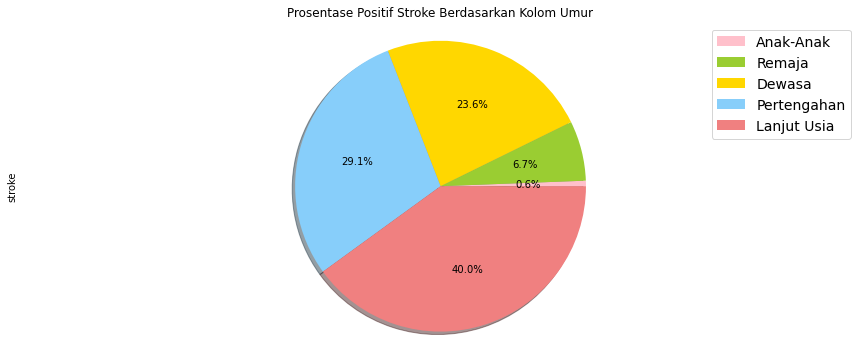

<Figure size 432x288 with 0 Axes>

In [64]:
# Membuat pie chart
colors_list = ['pink', 'yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

dfa['stroke'].plot(kind='pie',
                   figsize=(15, 6),
                   autopct='%1.1f%%', # menambahkan persentase
                   startangle=360,     # start angle 90° 
                   shadow=True, # menambahkan shadow
                   labels=None,
                   colors=colors_list    # mengatur warna
                  )

plt.title('Prosentase Positif Stroke Berdasarkan Kolom Umur')
plt.axis('equal')     # mengatur rasio axis agar sama antara axis x dan y

# add legend
plt.legend(labels=dfa1.index, loc='upper right', fontsize=14) 
plt.show()
plt.savefig('Positif Stroke Kolom Umur.jpg', format='jpg', bbox_inches='tight')

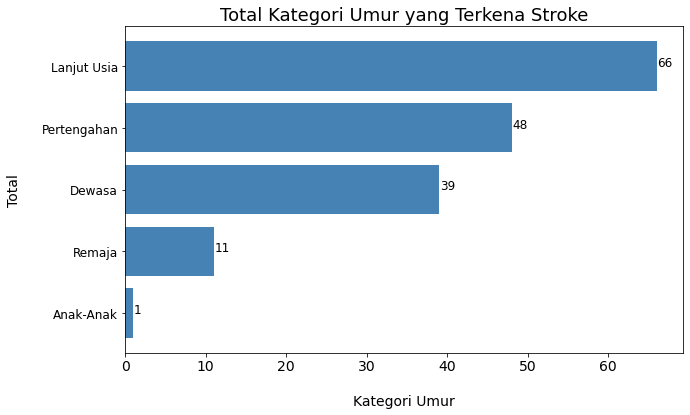

<Figure size 432x288 with 0 Axes>

In [65]:
# Membuat horizontal bar chart dengan label

plt.figure(figsize=(10,6))
plot_data = plt.barh(dfa['age_Bins'], dfa['stroke'], color='steelblue')

for index, value in enumerate(dfa['stroke']): 
    plt.annotate(value, xy=(value+0.1, index), fontsize=12)

plt.title('Total Kategori Umur yang Terkena Stroke', size=18)
plt.xlabel('\nKategori Umur', size=14)
plt.ylabel('Total\n', size=14)
plt.xticks(size=14)
plt.yticks(size=12)
plt.show()
plt.savefig('Total Kategori Umur yang Terkena Stroke.png', format='png')

- __Insight dari grafik:__ Penderita stroke terbanyak diderita oleh kategori <code>Lanjut Usia</code> dengan rentang umur 75 tahun keatas

# Analysist gender dengan stroke

In [66]:
df[['gender','stroke']].head()

,gender,stroke
0,Male,1
1,Male,1
2,Female,1
3,Female,1
4,Female,1


In [67]:
# Menghitung jumlah data kolom gender yang telah dikategorikan menjadi Female dan Male
df_gender=df.groupby('gender').size()
dga = pd.DataFrame(df_gender).reset_index()
dga = dga.rename(columns={0:'total'})
dga.set_index('gender', inplace=True)
dga= dga.iloc[:2]
dga

,total
gender,
Female,2592
Male,1800


In [68]:
df_gender_stroke = df.groupby('gender')['stroke'].agg('sum')
dgaS = pd.DataFrame(df_gender_stroke).reset_index()
dgaS= dgaS.iloc[:2]
dgaS

,gender,stroke
0,Female,98
1,Male,67


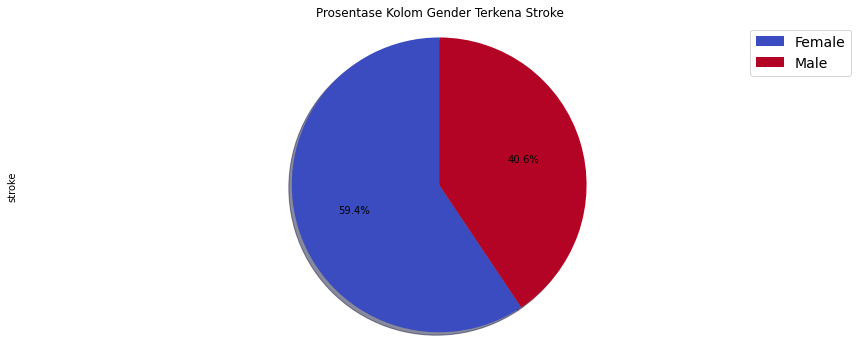

<Figure size 432x288 with 0 Axes>

In [69]:
# Membuat pie chart Kategori Umur Terkena Stroke

dgaS['stroke'].plot(kind='pie',
                   figsize=(15, 6),
                   autopct='%1.1f%%', # menambahkan persentase
                   startangle=90,     # start angle 90° 
                   shadow=True,        # menambahkan shadow
                   labels=None,       # menghilangkan label pada pie chart
                   cmap='coolwarm'     # memberikan colors menggunakan method cmap
                  )

plt.title('Prosentase Kolom Gender Terkena Stroke')
plt.axis('equal')     # mengatur rasio axis agar sama antara axis x dan y

# add legend
plt.legend(labels=dgaS['gender'], loc='upper right', fontsize=14)
plt.show()
plt.savefig('Positif Stroke Gender.jpg', format='jpg', bbox_inches='tight')

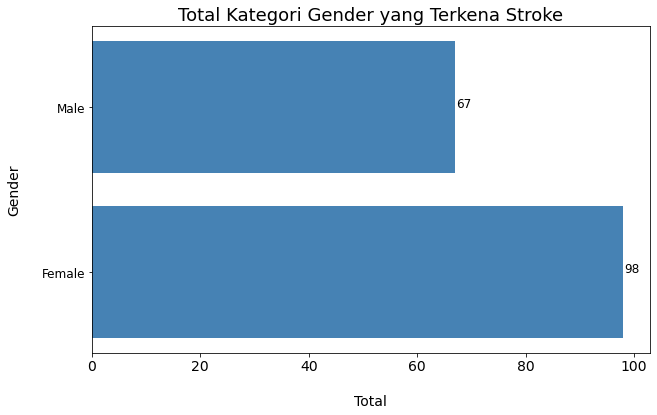

<Figure size 432x288 with 0 Axes>

In [70]:
# Membuat horizontal bar chart dengan label

plt.figure(figsize=(10,6))
plot_data = plt.barh(dgaS['gender'], dgaS['stroke'], color='steelblue')

for index, value in enumerate(dgaS['stroke']): 
    plt.annotate(value, xy=(value+0.1, index), fontsize=12)

plt.title('Total Kategori Gender yang Terkena Stroke', size=18)
plt.xlabel('\nTotal', size=14)
plt.ylabel('Gender\n', size=14)
plt.xticks(size=14)
plt.yticks(size=12)
plt.show()
plt.savefig('Total Kategori Umur yang Terkena Stroke.png', format='png')

- Insight dari grafik: Penderita stroke terbanyak berdasarkan gender adalah kategori <code>Female</code>

# Analysist smoking_status with stroke

In [71]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_Bins,bmi_Bins,age_Bins
0,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Medium,Gemuk,Lanjut Usia
1,53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,Low,Gemuk,Pertengahan
2,10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1,Medium,Normal,Pertengahan


In [72]:
smoking_status = df.groupby('smoking_status').size()
dsma = pd.DataFrame(smoking_status).reset_index()
dsma = dsma.rename(columns={0:'total'})
dsma.set_index('smoking_status', inplace=True)
dsma

,total
smoking_status,
Unknown,1419
formerly smoked,708
never smoked,1596
smokes,670


In [73]:
smoking_status_stroke = df.groupby('smoking_status')['stroke'].agg('sum')
dsmaS = pd.DataFrame(smoking_status_stroke).reset_index()
dsmaS

,smoking_status,stroke
0,Unknown,34
1,formerly smoked,47
2,never smoked,58
3,smokes,26


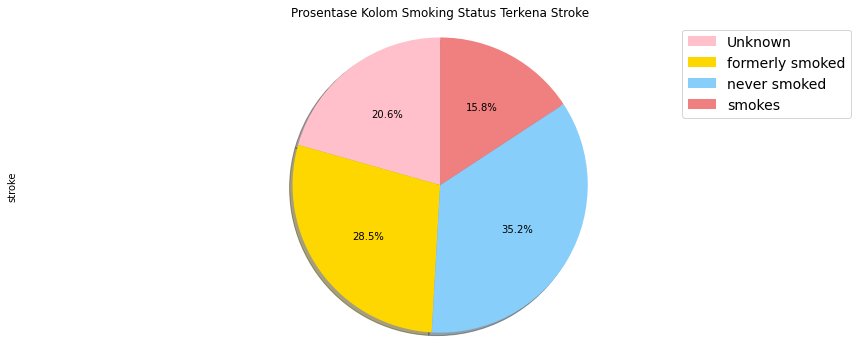

<Figure size 432x288 with 0 Axes>

In [74]:
# Membuat pie chart Kategori Umur Terkena Stroke
colors_list = ['pink', 'gold', 'lightskyblue', 'lightcoral']

dsmaS['stroke'].plot(kind='pie',
                   figsize=(15, 6),
                   autopct='%1.1f%%', # menambahkan persentase
                   startangle=90,     # start angle 90° 
                   shadow=True,        # menambahkan shadow
                   labels=None,      # menghilangkan label pada pie chart
                   colors=colors_list
                  )

plt.title('Prosentase Kolom Smoking Status Terkena Stroke')
plt.axis('equal')     # mengatur rasio axis agar sama antara axis x dan y

# add legend
plt.legend(labels=dsmaS['smoking_status'], loc='upper right', fontsize=14)
plt.show()
plt.savefig('Positif Stroke Smoking Status.jpg', format='jpg', bbox_inches='tight')

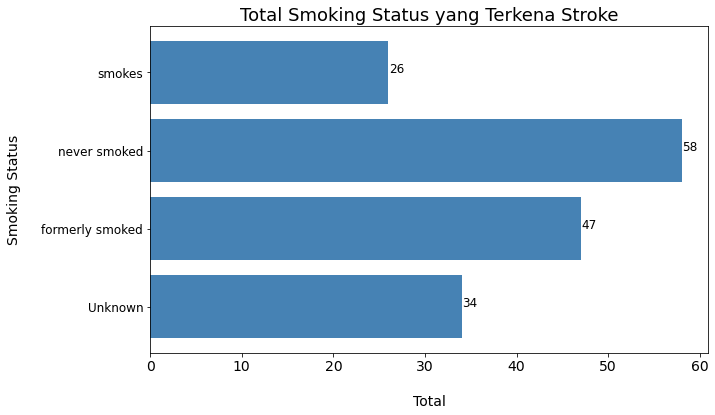

<Figure size 432x288 with 0 Axes>

In [75]:
# Membuat horizontal bar chart dengan label

plt.figure(figsize=(10,6))
plot_data = plt.barh(dsmaS['smoking_status'],dsmaS['stroke'],  color='steelblue')

for index, value in enumerate(dsmaS['stroke']): 
    plt.annotate(value, xy=(value+0.1, index), fontsize=12)

plt.title('Total Smoking Status yang Terkena Stroke', size=18)
plt.xlabel('\nTotal', size=14)
plt.ylabel('Smoking Status\n', size=14)
plt.xticks(size=14)
plt.yticks(size=12)
plt.show()
plt.savefig('Total Kategori Umur yang Terkena Stroke.png', format='png')

- __Insight dari grafik:__ Berdasarkan hubungan smoking_status dengan stroke, penderita stroke terbanyak diperoleh dari <code>orang yang tidak terbiasa merokok</code>
- __Insight lain:__ status merokok berpengaruh kecil terhadap penyakit <code>STROKE</code>

In [76]:
# Total Penyakit Lain yang juga menderita Stroke
dos = df.groupby('stroke')['hypertension','heart_disease'].size()
dos

<ipython-input-76-38ce5fbfc5a3>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dos = df.groupby('stroke')['hypertension','heart_disease'].size()


stroke
0    4228
1     165
dtype: int64

__Kesimpulan:__
- Berdasarkan kolom target <code>stroke</code> data (0) disebut negatif stroke dengan (1) positif stroke lebih banyak data yang negatif stroke. Dan disimpulkan dataset mengalami <code>imbalance</code>

# Data Processing to Machine Learning

# __Encoding__ 

__Data Encoding__ adalah salah satu tahap praproses data sebelum diproses dengan algoritma <i>machine learning</i>. Dalam mengerjakan projek <i>data science</i> ataupun <i>machine learning</i>, kita akan sangat mungkin menemukan satu atau beberapa fitur yang bertipe kategori, misalnya 'Sangat Baik', 'Baik', 'Tidak Baik'. Nah, komputer tidak dapat memproses data bertipe kategori sehingga kita harus mengubah data tersebut menjadi berbentuk bilangan. Proses ini disebut dengan encoding.

In [77]:
### encoding data method get_dummies()
### Checking data types
df.dtypes

id                           int64
gender                      object
age                          int64
hypertension                 int64
heart_disease                int64
ever_married                object
work_type                   object
Residence_type              object
avg_glucose_level          float64
bmi                        float64
smoking_status              object
stroke                       int64
avg_glucose_level_Bins    category
bmi_Bins                  category
age_Bins                  category
dtype: object

In [78]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,4383,4384,4385,4386,4387,4388,4389,4390,4391,4392
id,31112,53882,10434,27419,60491,12109,12095,12175,58202,27458,...,7293,68398,36901,45010,14180,18234,44873,19723,37544,44679
gender,Male,Male,Female,Female,Female,Female,Female,Female,Female,Female,...,Male,Male,Female,Female,Female,Female,Female,Female,Male,Female
age,80,74,69,59,78,81,61,54,50,60,...,40,82,45,57,13,80,81,35,51,44
hypertension,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
heart_disease,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ever_married,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,...,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes
work_type,Private,Private,Private,Private,Private,Private,Govt_job,Private,Self-employed,Private,...,Private,Self-employed,Private,Private,children,Private,Self-employed,Self-employed,Private,Govt_job
Residence_type,Rural,Rural,Urban,Rural,Urban,Rural,Rural,Urban,Rural,Urban,...,Rural,Rural,Urban,Rural,Rural,Urban,Urban,Rural,Rural,Urban
avg_glucose_level,105.92,70.09,94.39,76.15,58.57,80.43,120.46,104.51,167.41,89.22,...,83.94,71.97,97.95,77.93,103.08,83.75,125.2,82.99,166.29,85.28
bmi,32.5,27.4,22.8,27.4,24.2,29.7,36.8,27.3,30.9,37.8,...,27.4,28.3,24.5,21.7,18.6,27.4,40,30.6,25.6,26.2


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4393 entries, 0 to 4392
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      4393 non-null   int64   
 1   gender                  4393 non-null   object  
 2   age                     4393 non-null   int64   
 3   hypertension            4393 non-null   int64   
 4   heart_disease           4393 non-null   int64   
 5   ever_married            4393 non-null   object  
 6   work_type               4393 non-null   object  
 7   Residence_type          4393 non-null   object  
 8   avg_glucose_level       4393 non-null   float64 
 9   bmi                     4393 non-null   float64 
 10  smoking_status          4393 non-null   object  
 11  stroke                  4393 non-null   int64   
 12  avg_glucose_level_Bins  4393 non-null   category
 13  bmi_Bins                4393 non-null   category
 14  age_Bins                

In [80]:
### encoding data method get_dummies()
### Step1: ubah data yang bertipe string menjadi categorical
df['gender'] = df['gender'].astype('category')
df['smoking_status'] = df['smoking_status'].astype('category')
df['avg_glucose_level_Bins'] = df['avg_glucose_level_Bins'].astype('category')
df['bmi_Bins'] = df['bmi_Bins'].astype('category')

In [81]:
df['age_Bins'] = df['age_Bins'].astype('category')

# Encoding Method .cat.codes

In [82]:
### Menggunakan method .cat.codes
### merubah data dari tipe string ke numerik dilakukan di line yg terpisah
df['gender'] = df['gender'].cat.codes
df['smoking_status'] = df['smoking_status'].cat.codes
df['avg_glucose_level_Bins'] = df['avg_glucose_level_Bins'].cat.codes
df['bmi_Bins'] = df['bmi_Bins'].cat.codes

In [83]:
df['age_Bins'] = df['age_Bins'].cat.codes

In [84]:
df.head().T

,0,1,2,3,4
id,31112,53882,10434,27419,60491
gender,1,1,0,0,0
age,80,74,69,59,78
hypertension,0,1,0,0,0
heart_disease,1,1,0,0,0
ever_married,Yes,Yes,No,Yes,Yes
work_type,Private,Private,Private,Private,Private
Residence_type,Rural,Rural,Urban,Rural,Urban
avg_glucose_level,105.92,70.09,94.39,76.15,58.57
bmi,32.5,27.4,22.8,27.4,24.2


# Fitur Selection

In [85]:
# Diperoleh dari dataset df kolom yang diambil berasal dari parameter utamanya saja
FSelection = df[['age_Bins','bmi_Bins','avg_glucose_level_Bins','hypertension','heart_disease','smoking_status','gender']]

In [86]:
# Kolom Target
y = df['stroke']

In [87]:
# Kolom Fiture
X = FSelection

# RFE

In [88]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()
rfe = RFECV(lr, min_features_to_select = 4, cv = 5)
rfe.fit(X,y)

print("\nChosen features")
print(list(X.columns[rfe.get_support()]))


Chosen features
['age_Bins', 'hypertension', 'heart_disease', 'smoking_status']


# SelectFromModel

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

rf = RandomForestRegressor()
selector = SelectFromModel(estimator=rf)
selector.fit(X, y)

print("Feature Importances")
print(selector.estimator_.feature_importances_)
print("Threshold")
print(selector.threshold_)
print("Keep Features?")
print(selector.get_support())

Feature Importances
[0.26609935 0.10509452 0.1437014  0.07473229 0.07082206 0.21142271
 0.12812767]
Threshold
0.14285714285714285
Keep Features?
[ True False  True False False  True False]


- ___Menurut Select From Model yang paling berpengaruh adalah :___
- [ 'avg_glucose_level_Bins','smoking_status','age_Bins' ]

# Feature Importances

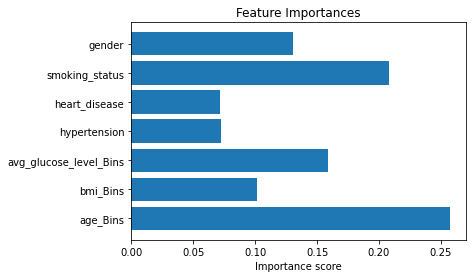

In [90]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

rf = RandomForestRegressor()
rf.fit(X, y)

plt.barh(X.columns, rf.feature_importances_, )
plt.xlabel("Importance score")
plt.title("Feature Importances")
plt.show()

- ___Menurut Feature Importance yang paling berpengaruh adalah :___
- [ 'gender','smoking_status','heart_disease','hypertension','avg_glucose_level_Bins','bmi_Bins','age_Bins' ]

# Correlation Analysist

In [91]:
from sklearn.preprocessing import MinMaxScaler

X_mm = MinMaxScaler().fit_transform(X)
X_mm = pd.DataFrame(X_mm, columns=X.columns)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,avg_glucose_level_Bins,bmi_Bins,age_Bins
0,31112,1,80,0,1,Yes,Private,Rural,105.92,32.5,2,1,1,2,4
1,53882,1,74,1,1,Yes,Private,Rural,70.09,27.4,2,1,0,2,3
2,10434,0,69,0,0,No,Private,Urban,94.39,22.8,2,1,1,1,3
3,27419,0,59,0,0,Yes,Private,Rural,76.15,27.4,0,1,0,2,2
4,60491,0,78,0,0,Yes,Private,Urban,58.57,24.2,0,1,0,1,4


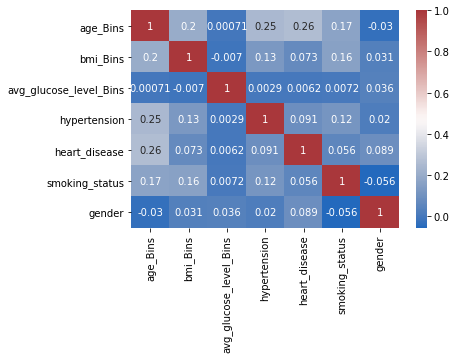

In [92]:
import seaborn as sns
corr = X_mm.corr(method="pearson")
sns.heatmap(corr, cmap="vlag", annot=True)

In [93]:
X_y = pd.concat([X,y], axis=1)
corr_X_y = X_y.corr(method="pearson")["stroke"]
corr_X_y

age_Bins                  0.243846
bmi_Bins                  0.057638
avg_glucose_level_Bins    0.008912
hypertension              0.113078
heart_disease             0.089750
smoking_status            0.020991
gender                   -0.001660
stroke                    1.000000
Name: stroke, dtype: float64

- ___Menurut Correlation Analysist Matrics yang paling berpengaruh adalah :___
- [ 'age_Bins','bmi_Bins','hypertension','heart_disease' ]

In [94]:
# menambahkan kolom fitur menurut matrics correlation

FeatureSelection = df[[ 'age_Bins','bmi_Bins','hypertension','heart_disease' ]]
FeatureSelection

,age_Bins,bmi_Bins,hypertension,heart_disease
0,4,2,0,1
1,3,2,1,1
2,3,1,0,0
3,2,2,0,0
4,4,1,0,0
...,...,...,...,...
4388,4,2,1,0
4389,4,2,0,0
4390,1,2,0,0
4391,2,1,0,0


# Data Scalling

__Data scaling__ adalah proses mentranformasi nilai dari beberapa kolom/variabel numerik ke dalam range yang mirip.

In [95]:
# MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

# Normalisasi dengan min max scaler
minmax = MinMaxScaler()
minmax_scaler = minmax.fit_transform(FeatureSelection)

# Tranformasi array menjadi dataframe
df_fitur_minmax = pd.DataFrame(data=minmax_scaler, columns=FeatureSelection.columns)

In [96]:
df_target = df['stroke']

In [97]:
# target
y = df_target

In [98]:
# fitur
x = df_fitur_minmax
x

,age_Bins,bmi_Bins,hypertension,heart_disease
0,1.00,1.0,0.0,1.0
1,0.75,1.0,1.0,1.0
2,0.75,0.5,0.0,0.0
3,0.50,1.0,0.0,0.0
4,1.00,0.5,0.0,0.0
...,...,...,...,...
4388,1.00,1.0,1.0,0.0
4389,1.00,1.0,0.0,0.0
4390,0.25,1.0,0.0,0.0
4391,0.50,0.5,0.0,0.0


# Train Test Split

In [99]:
# method .cat_codes
# membagi data menjadi train set dan test set untuk evaluasi
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2855, 4) (2855,)
Test set: (1538, 4) (1538,)


# Imbalance Dataset

__Penanganan Imbalance Dataset:__
- Dengan bantuan SMOTE

In [100]:
# Total Penyakit Lain yang juga menderita Stroke
dos = df.groupby('stroke')['age_Bins','bmi_Bins','avg_glucose_level_Bins','smoking_status','heart_disease','gender'].size()
dos

<ipython-input-100-bba32052972d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dos = df.groupby('stroke')['age_Bins','bmi_Bins','avg_glucose_level_Bins','smoking_status','heart_disease','gender'].size()


stroke
0    4228
1     165
dtype: int64

In [101]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(x_train,y_train)

In [102]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
Xtest_smote, ytest_smote = smote.fit_resample(x_test,y_test)

In [103]:
print(f'''Shape of Y before SMOTE: {y.shape}
Shape of Y after SMOTE: {y_smote.shape}''')

Shape of Y before SMOTE: (4393,)
Shape of Y after SMOTE: (5496,)


In [104]:
print(f'''Shape of X before SMOTE: {x.shape}
Shape of X after SMOTE: {X_smote.shape}''')

Shape of X before SMOTE: (4393, 4)
Shape of X after SMOTE: (5496, 4)


# Modeling Machine Learning

# Clasification K-Nearest Neighbors (KNN)

# Mencari nilai K terbaik

In [105]:
# Mencari nilai K dengan akurasi terbaik

Ks = 26
mean_acc = np.zeros((Ks-1))

for n in range(1, Ks):
    
    #Train Model and Predict  
    model_knn = KNeighborsClassifier(n_neighbors = n).fit(X_smote, y_smote)
    y_pred_K = model_knn.predict(Xtest_smote)
    
    mean_acc[n-1] = accuracy_score(ytest_smote, y_pred_K)

mean_acc

array([0.75878378, 0.75777027, 0.73986486, 0.73986486, 0.73986486,
       0.75540541, 0.73986486, 0.68310811, 0.73851351, 0.73716216,
       0.73716216, 0.73581081, 0.73581081, 0.73513514, 0.73175676,
       0.74932432, 0.74831081, 0.74831081, 0.74831081, 0.74831081,
       0.74695946, 0.74628378, 0.74628378, 0.74425676, 0.74425676])

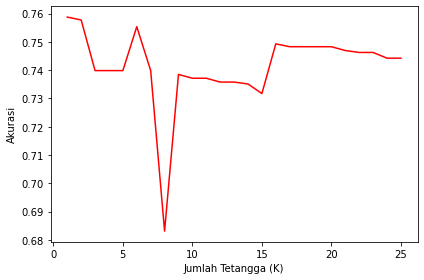

In [106]:
# Visualisasi hasil K 

plt.plot(range(1,Ks), mean_acc, 'r')
plt.ylabel('Akurasi')
plt.xlabel('Jumlah Tetangga (K)')
plt.tight_layout()
plt.show()

- K terbaik dilihat dari grafik <code>K = 16</code>

# Modeling KNN

In [147]:
k = 16

# Train Model
model_knn = KNeighborsClassifier(weights='distance', n_neighbors = k)
model_knn.fit(X_smote,y_smote)
model_knn

KNeighborsClassifier(n_neighbors=16, weights='distance')

# Prediction

In [153]:
# Menguji model dengan data testing

KNN_pred = model_knn.predict(Xtest_smote)
KNN_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [154]:
# Menampilkan data testing

ytest_smote[0:5]

0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64

# Evaluation

__Accuracy_Score__

In [151]:
# Mengukur kinerja model machine learning

from sklearn.metrics import accuracy_score

print('Akurasi Train set: ', accuracy_score(y_smote, model_knn.predict(X_smote)))
print('Akurasi Test set: ', accuracy_score(ytest_smote, KNN_pred))

Akurasi Train set:  0.7800218340611353
Akurasi Test set:  0.7564189189189189


__Cross Validation__

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

KNN = KFold(n_splits=20, random_state=42, shuffle=True) 

X = df_fitur_minmax       # fitur
Y = df_target                    # target

# Training dan testing model
model_knn = KNeighborsClassifier(weights='distance', n_neighbors = k).fit(X, Y)

# Evaluasi model dengan cross_val_score dengan scoring 'accuracy'
scores = cross_val_score(model_knn, X, Y, scoring='accuracy', cv=KNN, n_jobs=-1)
print('Accuracy score: %.2f' % (np.mean(scores)))

Accuracy score: 0.96


In [113]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [114]:
from sklearn.metrics import classification_report

# Melihat kinerja model
print(classification_report(ytest_smote, KNN_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1480
           1       0.78      0.67      0.72      1480

    accuracy                           0.74      2960
   macro avg       0.74      0.74      0.74      2960
weighted avg       0.74      0.74      0.74      2960



In [115]:
# menghitung confusion_matrix

print(confusion_matrix(ytest_smote, KNN_pred))

[[1196  284]
 [ 485  995]]


__ROC scores train__

In [116]:
# getting the probabilities of our predictions
y_scores = model_knn.predict_proba(X_smote)
y_scores = y_scores[:,1]

In [117]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_smote, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.7699570840457742


__ROC scores test__

In [144]:
# getting the probabilities of our predictions
y_scores_test = model_knn.predict_proba(Xtest_smote)
y_scores_test = y_scores_test[:,1]

In [145]:
from sklearn.metrics import roc_auc_score
r_a_score_test = roc_auc_score(ytest_smote, y_scores_test)
print("ROC-AUC-Score:", r_a_score_test)

ROC-AUC-Score: 0.7618597059897735


# Modeling Logistic Regression

In [118]:
# Training dan testing model
model_logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
model_logreg.fit(X_smote,y_smote)
LogisticRegression_pred = model_logreg.predict(Xtest_smote)

__Accuracy Scores__

In [119]:
from sklearn.metrics import accuracy_score

# Skor akurasi untuk data train dan test
print('Train set Accuracy: %.2f' % accuracy_score(y_smote, model_logreg.predict(X_smote)))
print('Test set Accuracy: %.2f' % accuracy_score(ytest_smote, LogisticRegression_pred))

Train set Accuracy: 0.76
Test set Accuracy: 0.76


__Clasification Report__

In [158]:
from sklearn.metrics import classification_report

print('Classification report : ')
print(classification_report(ytest_smote, LogisticRegression_pred, zero_division=1))

Classification report : 
              precision    recall  f1-score   support

           0       0.75      0.78      0.76      1480
           1       0.77      0.74      0.75      1480

    accuracy                           0.76      2960
   macro avg       0.76      0.76      0.76      2960
weighted avg       0.76      0.76      0.76      2960



__Cross Validation__

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=17, random_state=123, shuffle=True) 

X = df_fitur_minmax        # fitur
Y = df_target                    # target

# Training dan testing model
model_logreg = LogisticRegression(solver='liblinear', class_weight='balanced').fit(X, Y)

# Evaluasi model dengan cross_val_score dengan scoring 'accuracy'
scores = cross_val_score(model_logreg, X, Y, scoring='accuracy', cv=kf, n_jobs=-1)
print('Accuracy score: %.2f' % (np.mean(scores)))

Accuracy score: 0.77


In [121]:
from sklearn.metrics import mean_absolute_error        # import mean absolute error (MAE)
from sklearn.metrics import mean_squared_error         # import mean squared error
              
# menghitung MAE dan MSE untuk melihat kinerja model
print('MAE: ', mean_absolute_error(LogisticRegression_pred, ytest_smote))
print('MSE: ', mean_squared_error(LogisticRegression_pred, ytest_smote))

MAE:  0.2435810810810811
MSE:  0.2435810810810811


In [122]:
# menghitung confusion_matrix

print(confusion_matrix(ytest_smote, LogisticRegression_pred))

[[1149  331]
 [ 390 1090]]


__ROC Scores Train__

In [123]:
# getting the probabilities of our predictions

y_scores = model_logreg.predict_proba(X_smote)
y_scores = y_scores[:,1]

In [124]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_smote, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.8406674352552816


__ROC Scores Test__

In [155]:
# getting the probabilities of our predictions

y_scores_test_logreg = model_logreg.predict_proba(Xtest_smote)
y_scores_test_logreg = y_scores_test_logreg[:,1]

In [157]:
from sklearn.metrics import roc_auc_score
r_a_score_test_logreg = roc_auc_score(ytest_smote, y_scores_test_logreg)
print("ROC-AUC-Score:", r_a_score_test_logreg)

ROC-AUC-Score: 0.8546813367421475


# Modelling Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier

model_dtree = DecisionTreeClassifier(max_depth=15, criterion='entropy')
model_dtree.fit(X_smote,y_smote)
model_dtree

DecisionTreeClassifier(criterion='entropy', max_depth=15)

__Prediction__

In [127]:
# Prediksi dengan X_test

y_pred_dtree = model_dtree.predict(Xtest_smote)

In [128]:
# Menampilkan y_pred dan y_test

print(y_pred_dtree [0:5])
print(ytest_smote [0:5])

[0 0 1 1 1]
0    0
1    0
2    0
3    0
4    0
Name: stroke, dtype: int64


__Accuracy Scores__

In [129]:
from sklearn.metrics import accuracy_score

# Menampilkan akurasi
print('Akurasi Train Test Decision Tree : ', accuracy_score(y_smote, model_dtree.predict(X_smote)))
print('Test Akurasi Decision Tree : ', accuracy_score(ytest_smote, y_pred_dtree))

Akurasi Train Test Decision Tree :  0.8058588064046579
Test Akurasi Decision Tree :  0.7983108108108108


__Cross Validation__

In [130]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

KF = KFold(n_splits=20, random_state=123, shuffle=True) 

X = df_fitur_minmax       # fitur
Y = df_target                    # target

# Training dan testing model
model_dtree = DecisionTreeClassifier(max_depth=17, criterion='entropy').fit(X, Y)

# Evaluasi model dengan cross_val_score dengan scoring 'accuracy'
scores = cross_val_score(model_knn, X, Y, scoring='accuracy', cv=KF, n_jobs=-1)
print('Accuracy score: %.2f' % (np.mean(scores)))

Accuracy score: 0.96


__classification Report__

In [131]:
from sklearn.metrics import classification_report

# Menampilkan classification report
print(classification_report(ytest_smote, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1480
           1       0.74      0.92      0.82      1480

    accuracy                           0.80      2960
   macro avg       0.82      0.80      0.80      2960
weighted avg       0.82      0.80      0.80      2960



__Confusion Matrix__

In [132]:
# menghitung confusion_matrix
print(confusion_matrix(ytest_smote, y_pred_dtree))

[[1006  474]
 [ 123 1357]]


__ROC Scores Train__

In [133]:
# getting the probabilities of our predictions
ysc_tree = model_dtree.predict_proba(X_smote)
ysc_tree = ysc_tree[:,1]

In [134]:
from sklearn.metrics import roc_auc_score
r_d_score = roc_auc_score(y_smote, ysc_tree)
print("ROC-AUC-Score:", r_d_score)

ROC-AUC-Score: 0.8506943782324686


__ROC Scores Test__

In [174]:
# getting the probabilities of our predictions
ysc_tree_test = model_dtree.predict_proba(Xtest_smote)
ysc_tree_test= ysc_tree_test[:,1]

In [175]:
from sklearn.metrics import roc_auc_score
r_d_score_tree_test = roc_auc_score(ytest_smote, ysc_tree_test)
print("ROC-AUC-Score:", r_d_score_tree_test)

ROC-AUC-Score: 0.8686210281227174


# Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier

# Membuat model dengan random forest
model_rf = RandomForestClassifier(n_estimators=80, criterion='entropy')
model_rf.fit(X_smote,y_smote)
model_rf

RandomForestClassifier(criterion='entropy', n_estimators=80)

__Prediction__

In [136]:
# Menguji model

RandomForest_pred = model_rf.predict(Xtest_smote)

In [137]:
# Menampilkan hasil prediksi dan data sebenarnya

print('prediksi:')
print(RandomForest_pred[0:10])
print('\nsebenarnya:')
print(y_test[0:10])

prediksi:
[0 0 1 1 1 0 0 0 0 0]

sebenarnya:
4160    0
3611    0
1769    0
414     0
3856    0
2505    0
3765    0
881     0
561     0
1010    0
Name: stroke, dtype: int64


__Accuracy Scores__

In [138]:
from sklearn import metrics

# Menampilkan akurasi
print('Akurasi Random Forest Train :', metrics.accuracy_score(y_smote, model_rf.predict(X_smote)))
print('Akurasi Random Forest Test :', metrics.accuracy_score(ytest_smote, RandomForest_pred))

Akurasi Random Forest Train : 0.8056768558951966
Akurasi Random Forest Test : 0.7912162162162162


__Cross Validation__

In [139]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

RF = KFold(n_splits=20, random_state=123, shuffle=True) 

X = df_fitur_minmax       # fitur
Y = df_target                    # target

# Training dan testing model
model_rf = RandomForestClassifier(n_estimators=80, criterion='entropy').fit(X, Y)

# Evaluasi model dengan cross_val_score dengan scoring 'accuracy'
scores = cross_val_score(model_rf, X, Y, scoring='accuracy', cv=RF, n_jobs=-1)
print('Accuracy score: %.2f' % (np.mean(scores)))

Accuracy score: 0.96


__Classification Report__

In [140]:
from sklearn.metrics import classification_report

# Menampilkan classification report
print(classification_report(ytest_smote, RandomForest_pred))

              precision    recall  f1-score   support

           0       0.87      0.68      0.77      1480
           1       0.74      0.90      0.81      1480

    accuracy                           0.79      2960
   macro avg       0.81      0.79      0.79      2960
weighted avg       0.81      0.79      0.79      2960



__Confusion Matrix__

In [141]:
# menghitung confusion_matrix
print(confusion_matrix(ytest_smote, RandomForest_pred))

[[1011  469]
 [ 149 1331]]


__ROC Scores Train__

In [142]:
# getting the probabilities of our predictions
ysc_rf = model_rf.predict_proba(X_smote)
ysc_rf = ysc_rf[:,1]

In [143]:
from sklearn.metrics import roc_auc_score
r_f_score = roc_auc_score(y_smote, ysc_rf)
print("ROC-AUC-Score:", r_f_score)

ROC-AUC-Score: 0.8482130182278921


__ROC Scores Test__

In [180]:
# getting the probabilities of our predictions
ysc_rf_test = model_rf.predict_proba(Xtest_smote)
ysc_rf_test = ysc_rf_test[:,1]

In [181]:
from sklearn.metrics import roc_auc_score
r_f_score_test = roc_auc_score(ytest_smote, ysc_rf_test)
print("ROC-AUC-Score:", r_f_score_test)

ROC-AUC-Score: 0.8660831355003652


# Conclusion:
- Model Machine Learning yang direkomendasikan adalah <code>Decision Tree</code> dan <code>Random Forest</code>